# SHAP VALUES

SHAP values are used to increase the model's transparency. Shap value is the average of the marginal contributions across all permutations. That is, Shap values show how much each predictor (test variable) contributes either positively or negatively, to the target variable. If the Shap values are positive, then the chances of the sample being chip positive are high and the variable chosen (as predictor) represents the range of values a sample is chip positive or chip negative (control). (This will get clearer when we see the graphs later on.)

In [5]:
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, explained_variance_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import shap

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Importing the two datasets with all outliers removed.
%store -r df1
%store -r df2

In [7]:
df1

,DP,VD,HIAF,IMPACT,SYMBOL,sampleTimePt,gender,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,7281,26,0.0033,0.0,0.0,0.0,0.0,1.0,1.013348,0.857143,34.0,1.182210,0.0
4,7282,29,0.0036,0.0,0.0,0.0,0.0,1.0,1.009151,1.071429,32.7,1.061729,0.0
8,7282,24,0.0033,0.0,0.0,0.0,0.0,1.0,1.005268,1.000000,34.9,1.005270,0.0
13,1773,6,0.0035,0.0,1.0,0.0,0.0,1.0,1.017162,1.000000,37.0,1.017150,0.0
14,1773,7,0.0029,0.0,1.0,0.0,0.0,1.0,1.020619,0.750000,29.6,1.360580,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536636,1698,6,0.0036,0.0,28.0,1.0,1.0,1.0,1.026442,1.000000,35.0,1.026430,1.0
536645,710,6,0.0086,0.0,28.0,1.0,1.0,1.0,1.011429,1.000000,37.0,1.011410,1.0
536660,710,4,0.0057,0.0,28.0,1.0,1.0,1.0,1.014286,1.000000,34.0,1.014270,1.0
536693,710,4,0.0043,0.0,28.0,1.0,1.0,1.0,1.014286,1.000000,30.5,1.014270,1.0


## SHAP VALUES WITH KNN
Initially, check the shap values with the Kneighbors model that had the highest accuracy of all.

##### Dataset 1

In [8]:
X = df1.drop('chipOrControl', axis = 1)
y = df1['chipOrControl'] # target variable is chipOrControl

# Run the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state = 0)
knn = KNeighborsClassifier(n_neighbors = 3, weights='distance', metric = 'manhattan', algorithm = 'kd_tree')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.814


Then, calculate the shap values for this model which will be stored as an array in `shap_values_KNN_test`. We need to use a Shap explainer to calculate the shap values. Since the model used here is KNN, the only shap explainer for this is Kernel explainer. Kernel explainer works with all models, though it is slower than other Explainers and it gives an approximation rather than exact Shap values. (This is the reason why I have also included shap values with Randomforest classifier later on). Since a kernelExplainer on the entire dataset will takes days to produce an output, shap.kmeans is used to take a sample of the variables and then produce the shap values using this smaller dataset. (This takes atleast 2-3hrs to run)

In [7]:
### DO NOT RUN this block - could take upto 2hrs to run ###
X_train_summary = shap.kmeans(X_train, 5)
 
# using kmeans
explainerKNN = shap.KernelExplainer(knn.predict, X_train_summary)
shap_values_KNN_test = explainerKNN.shap_values(X_test)

In [9]:
#shap values are stored in jupyter Notebook, so that a re-run is not needed.
%store -r explainerKNN
%store -r shap_values_KNN_test

##### Dataset 2

In [10]:
X = df2.drop('chipOrControl', axis = 1) # drop the target variable for the features
y = df2['chipOrControl'] # create a target dataframe
# Produce the SHAP values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size=.8, random_state = 0)
knn = KNeighborsClassifier(n_neighbors = 3, weights='distance', metric = 'manhattan', algorithm = 'kd_tree')
knn.fit(X_train2, y_train2)
y_pred2 = knn.predict(X_test2)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test2, y_pred2),3)))

Accuracy 0.669


In [15]:
### DO NOT RUN this block - could take upto 3hrs to run ###
X_train_summary2 = shap.kmeans(X_train2, 5)
 
# using kmeans
explainerKNN2 = shap.KernelExplainer(knn.predict, X_train_summary2)
shap_values_KNN_test2 = explainerKNN2.shap_values(X_test2)

In [11]:
%store -r explainerKNN2
%store -r shap_values_KNN_test2

Summary plot shown below is similar to a correlation matrix with feature importance.(Not a lot of interesting info here) 

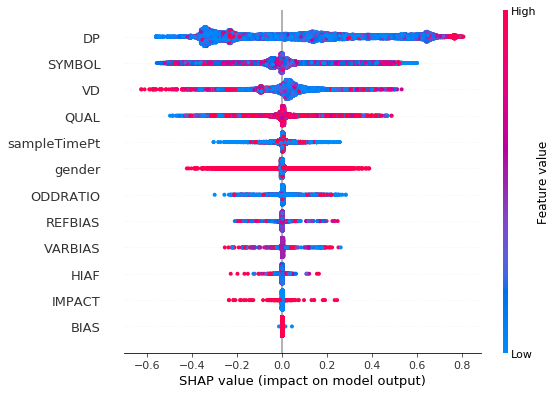

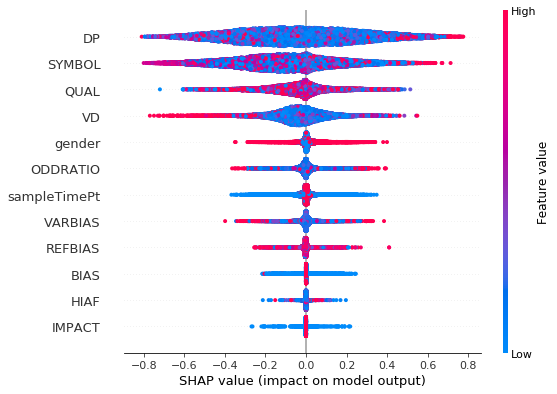

In [17]:
shap.summary_plot(shap_values_KNN_test, X_test)
shap.summary_plot(shap_values_KNN_test2, X_test2)

### Variable interaction with in general

A dependence plot is a scatter plot that shows the effect a single feature has on the predictions made by the model. This dependence plot is the final outcome we want. To produce this plot, we choose a variable from the dataset and plot it against it's shap value. The right side y-axis of each plot with the colour bar can be chosen by the user or automatically by the function if we dont specify. This is the variable that shows its interaction between the chosen variable (one with shap values). For plots below I've chosen three variables from dataset: `VD`, `QUAL` and `DP`. Since I haven't specified another variable for which I want to see the interaction, the plotting function automatically chooses the variable which interacts the most. For example, in dataset 1 `VD` interacts often with `SYMBOL`, whearas in dataset 2 it interacts often with `QUAL`. Now, since each variable interacts with a different variable for different datasets, it is hard to come up with a distinguishable outcome. So for the next set plots, I decided to choose a single interaction variable for both datasets which will help in showing show differences between the two datasets.

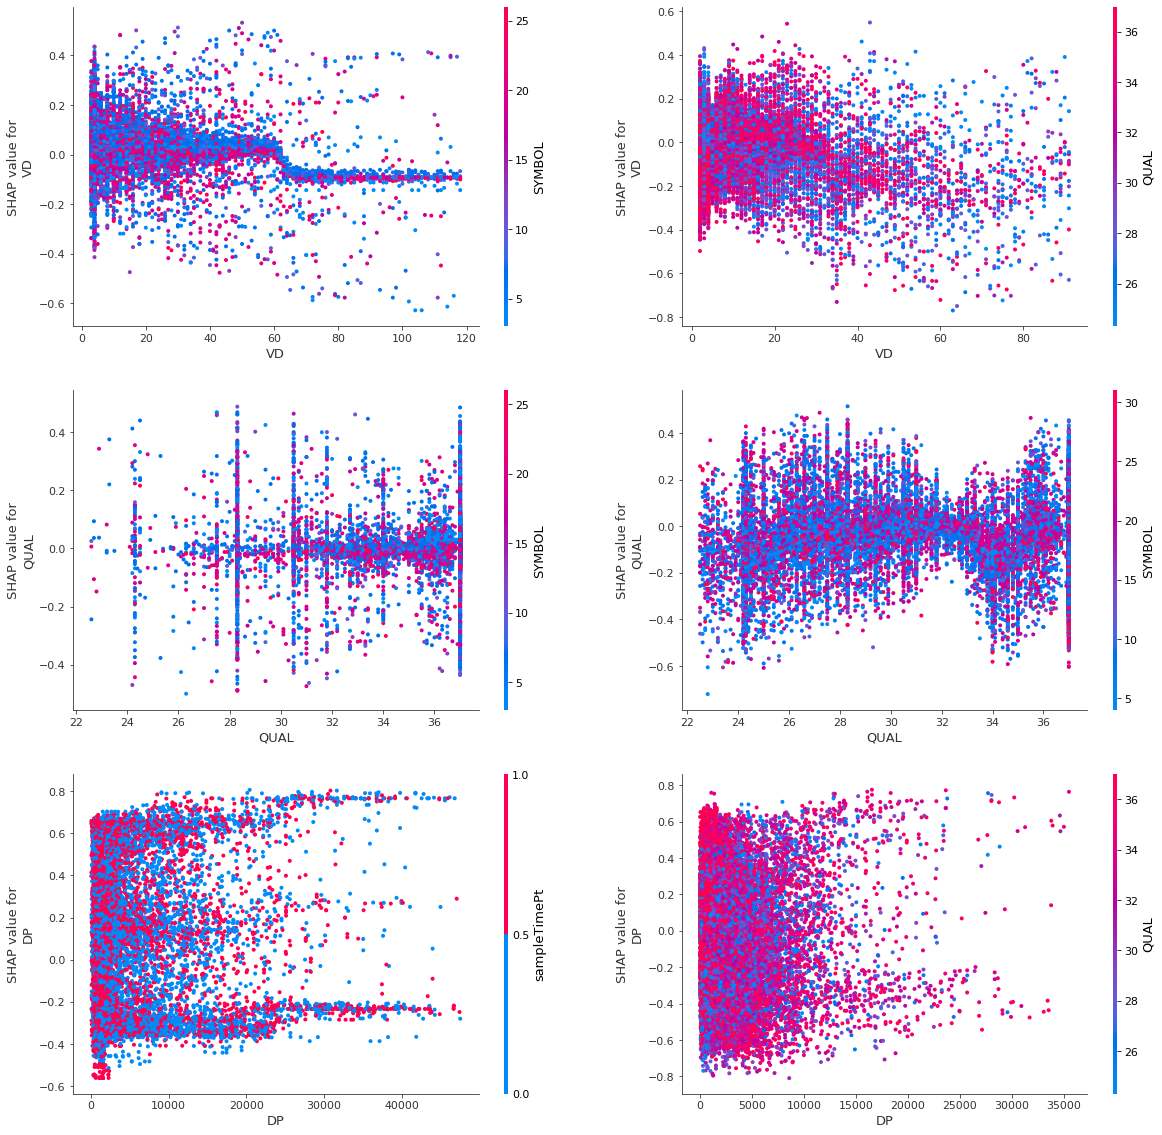

In [15]:
# left-side plots are for dataset 1 and the right side are dataset 2
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
shap.dependence_plot("VD", shap_values_KNN_test, X_test, ax=axes[0, 0], show=False)
shap.dependence_plot("VD", shap_values_KNN_test2, X_test2, ax=axes[0, 1], show=False)
shap.dependence_plot("QUAL", shap_values_KNN_test, X_test, ax=axes[1, 0], show=False)
shap.dependence_plot("QUAL", shap_values_KNN_test2, X_test2, ax=axes[1, 1], show=False)
shap.dependence_plot("DP", shap_values_KNN_test, X_test, ax=axes[2, 0], show=False)
shap.dependence_plot("DP", shap_values_KNN_test2, X_test2, ax=axes[2, 1], show=False)
plt.show()

### Variable interaction with `QUAL`

What this graph says? Consider the first row (VD as x-axis plots): Lower shap values mean chances of control and higher shap values mean chances of chip. So, for dataset 1 (top left corner) we can say that when VD is around 60 to 120, the chances of the sample being control (chip negative) is high. Wheares for dataset 2 (top right corner), it is hard to say.
- Left side plots have more pink dots (representing higher QUAL reads) compared to the right side plots of dataset 2. This represents the first dataset has better quality reads than dataset 2 which contributes to higher accuracy. (That is the first machine reads more accurately than the second) 
- Left side plot for variable VD can be used better for analysis because it's got a better shape. VD plot for dataset 1 gives a good shape than dataset 2 which has its data points varied all over the axis. Although the shape still slightly visible for dataset 2, it is not as good as the first dataset's plot. This variance in dataset 2 could contribute to lower accuracy.

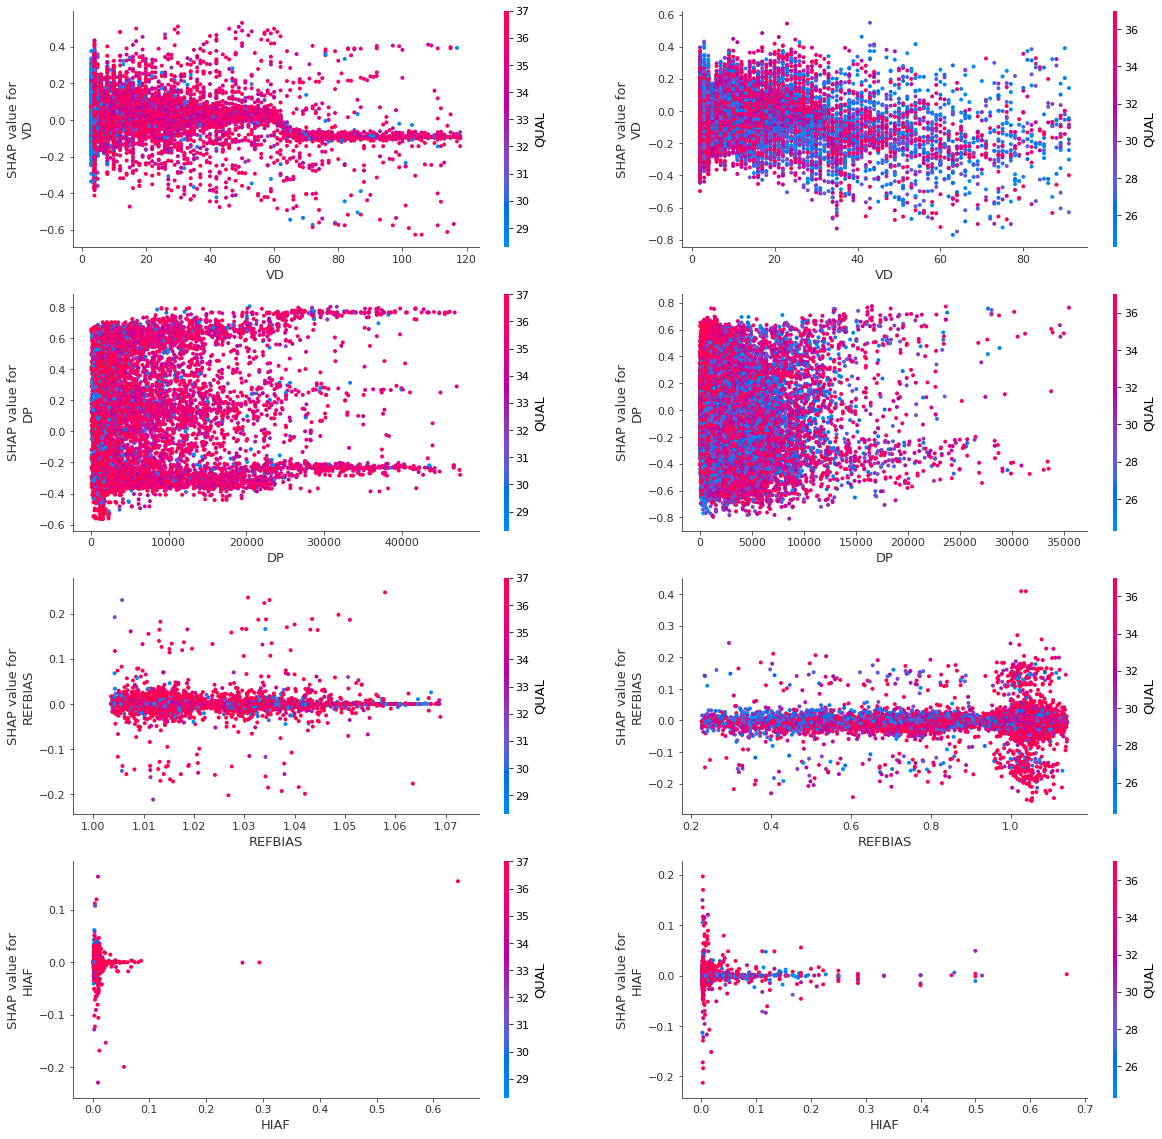

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
shap.dependence_plot("VD", shap_values_KNN_test, X_test, interaction_index="QUAL", ax=axes[0, 0], show=False)
shap.dependence_plot("VD", shap_values_KNN_test2, X_test2, interaction_index="QUAL", ax=axes[0, 1], show=False)
shap.dependence_plot("DP", shap_values_KNN_test, X_test, interaction_index="QUAL", ax=axes[1, 0], show=False)
shap.dependence_plot("DP", shap_values_KNN_test2, X_test2, interaction_index="QUAL", ax=axes[1, 1], show=False)
shap.dependence_plot("REFBIAS", shap_values_KNN_test, X_test, interaction_index="QUAL", ax=axes[2, 0], show=False)
shap.dependence_plot("REFBIAS", shap_values_KNN_test2, X_test2, interaction_index="QUAL", ax=axes[2, 1], show=False)
shap.dependence_plot("HIAF", shap_values_KNN_test, X_test, interaction_index="QUAL", ax=axes[3, 0], show=False)
shap.dependence_plot("HIAF", shap_values_KNN_test2, X_test2, interaction_index="QUAL", ax=axes[3, 1], show=False)
plt.show()

## SHAP VALUES WITH RANDOM FORESTS

Similar process is followed with random forests but this time shap explainer is TreeExplainer - can expect almost exact shap values and runtime is quicker than KernelExplainer.

[0.5180759  0.03240151 0.03860252 0.00078857 0.08202555 0.05381704
 0.08749443 0.         0.13042019 0.01547688 0.01770034 0.02319705]


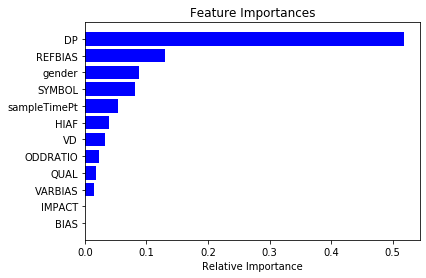

[4.59650514e-01 8.20999197e-03 1.34154130e-02 0.00000000e+00
 1.32683730e-01 1.19193352e-01 1.32336636e-01 3.48210419e-04
 9.02876413e-02 6.93906817e-03 1.51983995e-02 2.17370428e-02]


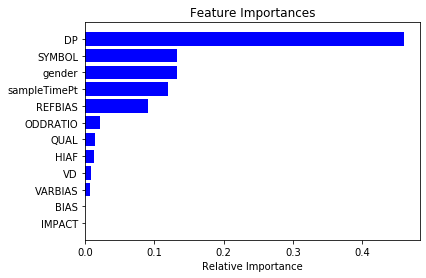

In [22]:
# DATASET 1
Y = df1['chipOrControl']
X =  df1.drop(['chipOrControl'], axis = 1)

# Split the data into train and test data:
X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(X, Y, test_size = 0.2)
rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10).fit(X_train_r, Y_train_r)  
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X_train_r.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# DATASET 2
Y = df2['chipOrControl']
X =  df2.drop(['chipOrControl'], axis = 1)

# Split the data into train and test data:
X_train_r2, X_test_r2, Y_train_r2, Y_test_r2 = train_test_split(X, Y, test_size = 0.2)
rf2 = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10).fit(X_train_r2, Y_train_r2)  
print(rf2.feature_importances_)
importances = rf2.feature_importances_
indices = np.argsort(importances)
features = X_train_r2.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

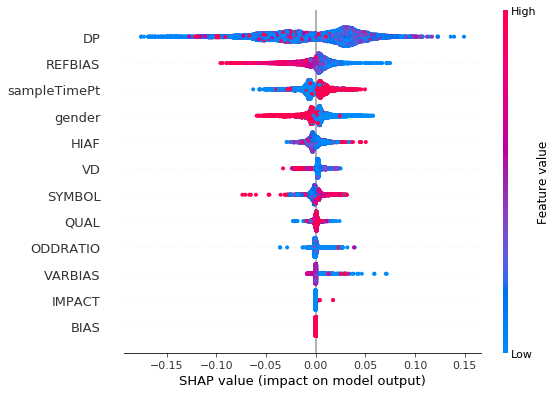

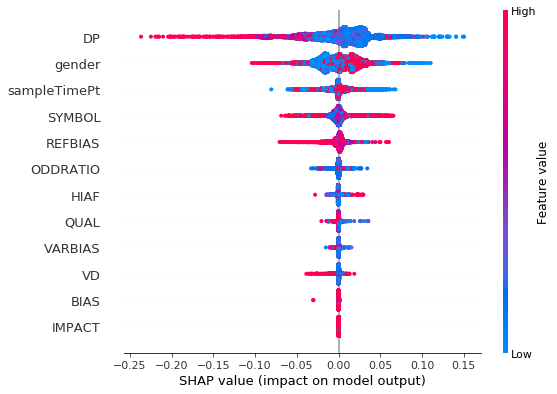

In [23]:
import shap
# Create object that can calculate shap values
explainer_rf = shap.TreeExplainer(rf)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values_rf = explainer_rf.shap_values(X_test_r)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values_rf, X_test_r)

import shap
# Create object that can calculate shap values
explainer_rf2 = shap.TreeExplainer(rf2)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values_rf2 = explainer_rf2.shap_values(X_test_r2)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values_rf2, X_test_r2)

### Variable interaction with `QUAL`

Similar to plots with KNN:
- When VD is around 0-35(approx), the chances of the sample being chip positive is high because of positive shap values. And when VD is around 40-120, the chances of the sample being chip negative (control) is high because of negative shap values. If we try to do a similar analysis for the second dataset, we can see that the points mostly lie around a shap value of 0 which cannot be confidently interpreted as chip or control. This could be reason for dataset-2's lower accuracy. 
- Left side plots have more pink dots which means high quality reads compared to right side (dataset 2).

Like mentioned before, shap values with randomforest give clear difference between the two datasets.

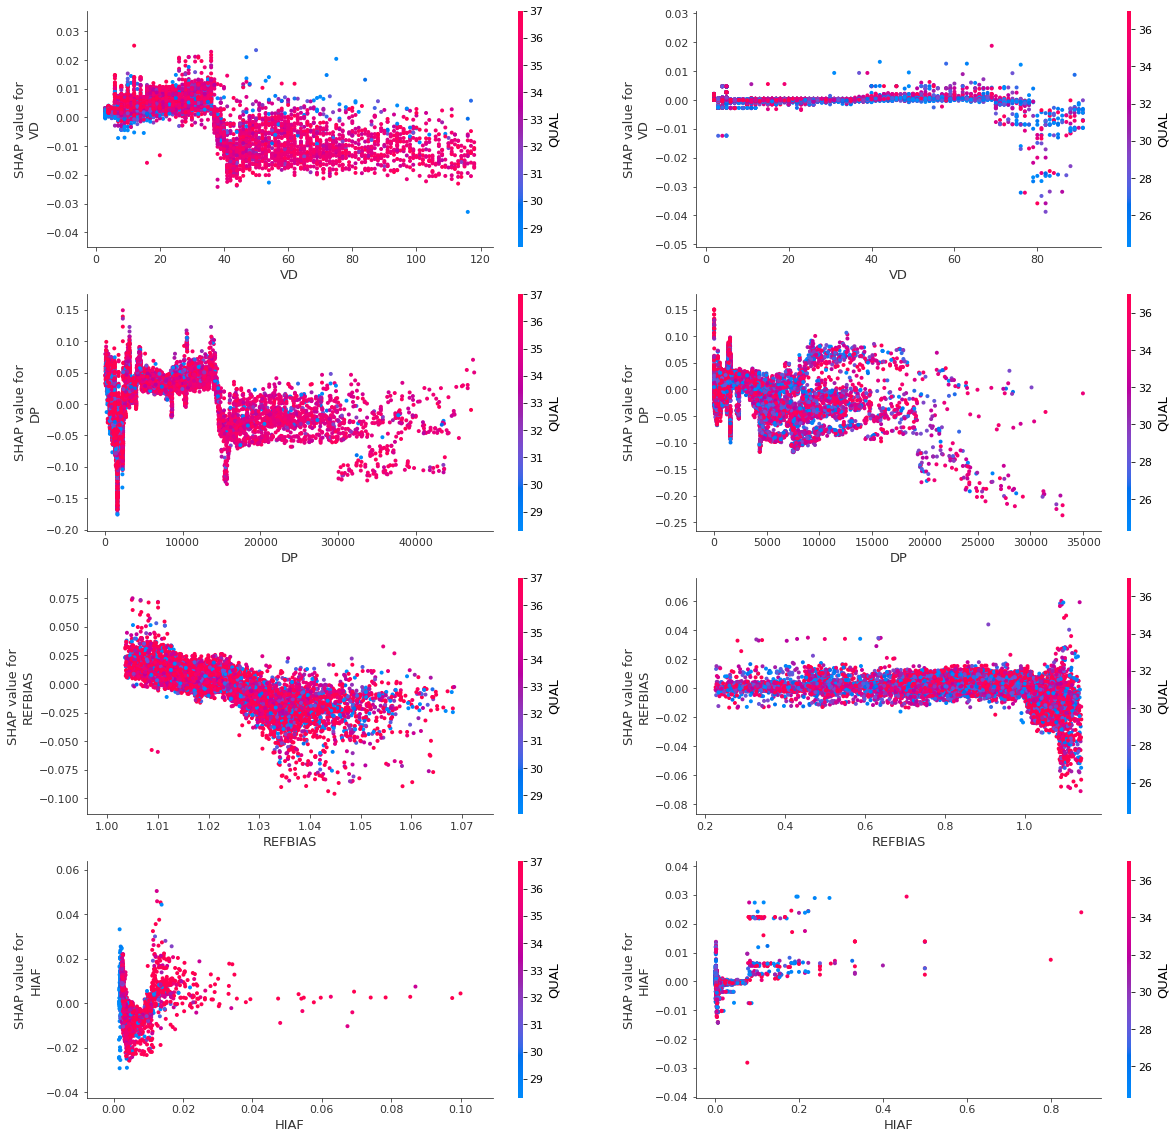

In [26]:
#graphs represent whether a variable was useful towards the model predictions or not
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
shap.dependence_plot("VD", shap_values_rf, X_test_r, interaction_index="QUAL", ax=axes[0, 0], show=False)
shap.dependence_plot("VD", shap_values_rf2, X_test_r2, interaction_index="QUAL", ax=axes[0, 1], show=False)
shap.dependence_plot("DP", shap_values_rf, X_test_r, interaction_index="QUAL", ax=axes[1, 0], show=False)
shap.dependence_plot("DP", shap_values_rf2, X_test_r2, interaction_index="QUAL", ax=axes[1, 1], show=False)
shap.dependence_plot("REFBIAS", shap_values_rf, X_test_r, interaction_index="QUAL", ax=axes[2, 0], show=False)
shap.dependence_plot("REFBIAS", shap_values_rf2, X_test_r2, interaction_index="QUAL", ax=axes[2, 1], show=False)
shap.dependence_plot("HIAF", shap_values_rf, X_test_r, interaction_index="QUAL", ax=axes[3, 0], show=False)
shap.dependence_plot("HIAF", shap_values_rf2, X_test_r2, interaction_index="QUAL", ax=axes[3, 1], show=False)
plt.show()

### Variable interaction with in general

Plots with automatic variable interactions - not very useful

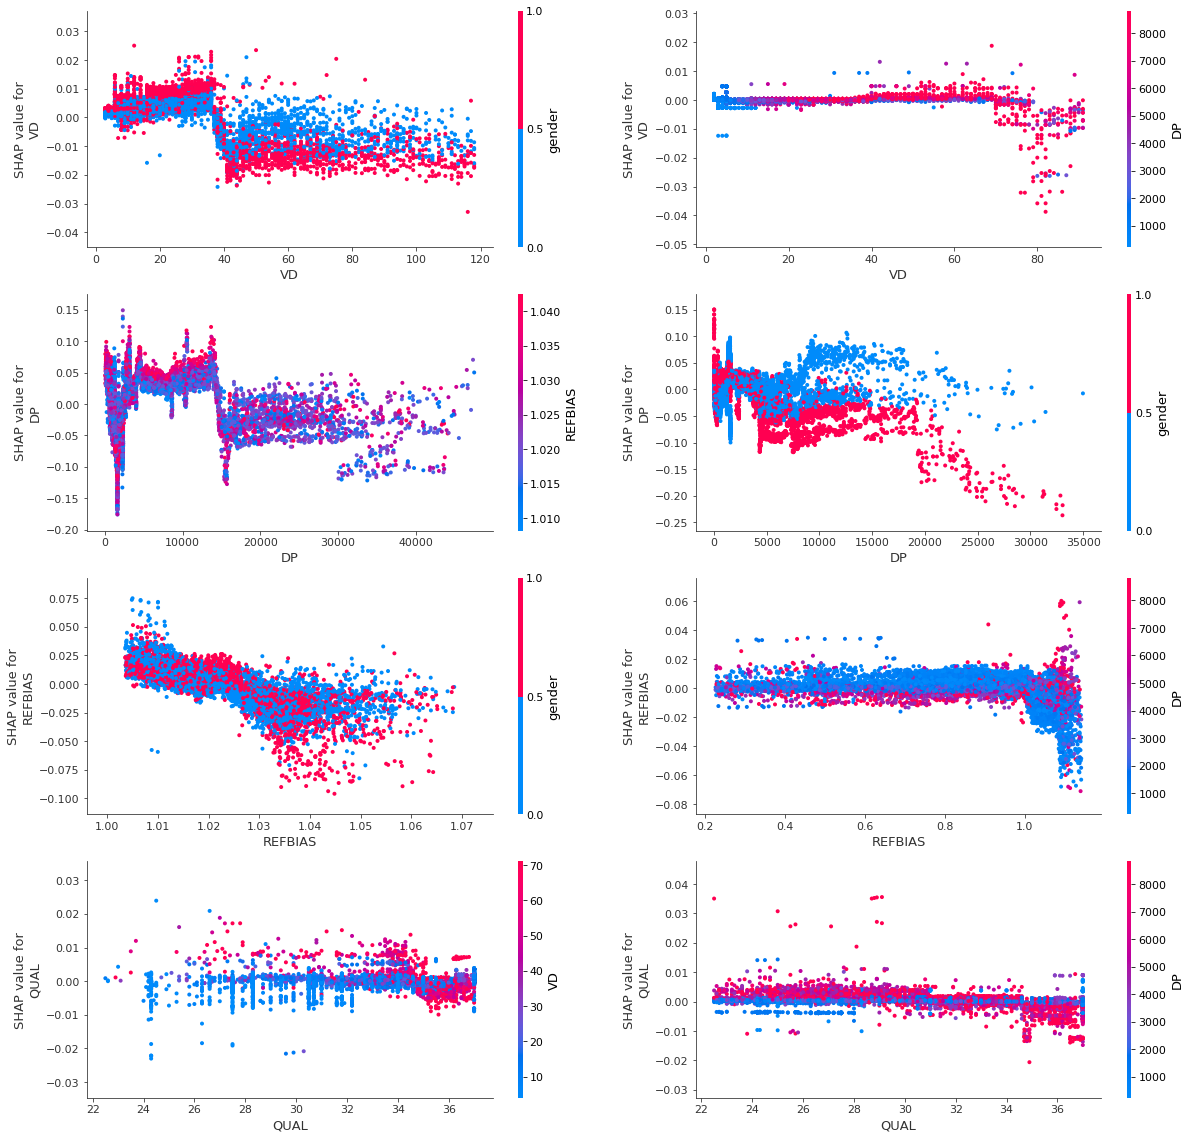

In [25]:
#graphs represent whether a variable was useful towards the model predictions or not
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
shap.dependence_plot("VD", shap_values_rf, X_test_r, ax=axes[0, 0], show=False)
shap.dependence_plot("VD", shap_values_rf2, X_test_r2, ax=axes[0, 1], show=False)
shap.dependence_plot("DP", shap_values_rf, X_test_r, ax=axes[1, 0], show=False)
shap.dependence_plot("DP", shap_values_rf2, X_test_r2, ax=axes[1, 1], show=False)
shap.dependence_plot("REFBIAS", shap_values_rf, X_test_r, ax=axes[2, 0], show=False)
shap.dependence_plot("REFBIAS", shap_values_rf2, X_test_r2, ax=axes[2, 1], show=False)
shap.dependence_plot("QUAL", shap_values_rf, X_test_r, ax=axes[3, 0], show=False)
shap.dependence_plot("QUAL", shap_values_rf2, X_test_r2, ax=axes[3, 1], show=False)
plt.show()

Links relating to shap values (if interested):
- https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
- https://christophm.github.io/interpretable-ml-book/shap.html
- https://slundberg.github.io/shap/notebooks/plots/dependence_plot.html
- https://blog.dominodatalab.com/shap-lime-python-libraries-part-2-using-shap-lime/